<img src="https://datern.co.uk/wp-content/uploads/2020/11/Datern_logo.png" width="300">

# Webscraping with BeautifulSoup

![Logo Image](https://datern.co.uk/wp-content/uploads/2020/07/qtq80-GTZMIV-e1596804686631.jpeg)

<font size="4">This session aims to give you an <strong>introduction to webscraping</strong> by giving easy to understand <strong>explanations and examples</strong>. We will break down the <strong>requests library and BeautifulSoup</strong>.
</font>
<hr>

# What is webscraping?
<font size="4">
    
<br>
In simple terms: extracting data from the internet.
    
<hr>
<br><br>
It is useful to know the basic structure of a website using HTML.
We discuss static websites only - where the server sends you an HTML page that already contains all the page information in the response. You parse that response, pick the relevant data and place it into a relevant format.<br><br>
Webscraping a dynamic website, the server might not send back any HTML at all. Instead, you could receive JavaScript code as a response. This code will look completely different from what you saw when you inspected the page with your browser's developer tools.

<br>
By the end of this article, you will have a strong grasp of the basics of web scraping and will easily implement a small program that can scrape a website. You could then create a .csv with a list of website to get similar information. 
<hr>
</font>

## 1 -  What is the requests library?

<font size="4">
<br>
Send all kinds of HTTP requests. It is an easy-to-use library with a lot of features ranging from passing parameters in URLs to sending custom headers and SSL Verification.
The requests library gives you a user-friendly way to fetch static HTML from the Internet using Python. You can then parse the HTML with another package called Beautiful Soup.

Note: You'll want to pass page.content instead of page.text to avoid problems with character encoding. The .content attribute holds raw bytes, which can be decoded better than the text representation you printed earlier using the .text attribute.

</font>
<hr>

## 2 - What is BeautifulSoup?
<font size="4">
<br>
BeautifulSoup returns a Parse Tree in HTML or XML.It's a parser.
It parses a web page and returns the data from HTML or XML pages .
You can use lxml which is very fast and can use find_all or select to get all tags.
It is used for pulling data out of web

This might raise more questions that it answers. A parser? XML? HTTP requests? eh?
</font>
<hr>

## 3  -  What is a parser?
<font size="4">
<br>
In simple terms: parsing is the process of turning some kind of data into some other type of data, usually into a more usable format for the task at hand.

In computer science terms, you are given text which is made up of tokens. The parser breaks down the tokens into usable data structures.
<br>
<br>
#Analogy<br><br>
A sentence is made up of words. A parser is similar to if you were to systematically break down the sentence into nouns, verbs, adjectives etc.
</font>
<hr>

## 4 - What is the difference between HTML and XML formats?
<font size="4">
<br>
XML focuses on transferring data, and is often used when writing web applications. Whereas, HTML is focused on the presentation of the data. Both are MARKUP LANGUAGES - which defines how a document looks, through annotation or tags. HTML has predefined tags. XML does not have predefined tags. Meaning you can create your own tags in XML which are known as element types.

Most of the web is HTML.

XML is content driven whereas HTML is format driven.
</font>
<hr>

### Why use the requests and BeautifulSoup library together?
<font size="4">
<br>
Both python packages can be used to get the text from a static webpage. However, the requests library makes it easy to authenticate an HTTP request from the server without having to log in. BeautifulSoup makes it easier to parse through the content. This is why the two packages are often used together.

If you get a status code of 200 then your request was successful. Any error code starting with a 4XX is a client side error, and any error starting with a 5XX is a server side error. 

___________________________________________________________________

These are the best practices from the BeautifulSoup documentation - which gives you very useful tips which I have copied below: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### Conclusion:
<font size="4">

<br>

Requests is for sending HTTP requests and you can print the response as text.
Beautiful soup is for extracting the html from a web page. It is slower than other packages like Selenium or Scrapy. However, it is by far the easiest and simplest to get to grips with.
</font>

### What kind of projects can you do with webscraping?
- Get the prices of your competitors products.
- Scrape review sites to see how your customers view you over time.
- Scrape job sites to never miss a new job posting.
- Automating mundane tasks: Say your company what to find the phone number of every person based on their email address. Or get a picture based on a list of requirements - this can be automated using webscraping.
- Creating a comparison of the best prices on different ecommerce sites.

# Simple Example using HTML string

<img src="https://www.webharvy.com/images/web%20scraping.png">

In [1]:
!pip install beautifulsoup4

In [2]:
from bs4 import BeautifulSoup

In [3]:
SIMPLE_HTML = '''<html>

<head></head>
<body>

<h1>Datern title</h1>
    <p class="subtitle">Lorem ipsum dolor sit amet. Consectetur edipiscim elit.</p>
    <p>Here's another paragraph without a class</p>
<ul>
    <li>Garry Barlow</li>
    <li>Rolf Harris</li>
    <li>Stewart Lee</li>
    <li>Jose Mourinho</li>
</ul>

</body>
</html>
'''

<font size="4">
<br>
We then pass this html string into a BeautifulSoup object which acts as a parser for the structure of the string.
<br><br>
Rememeber parsing is a programming term for understanding something that has a structure. 
</font>

## Create a variable that instantiates BeautifulSoup

In [4]:
simple_soup = BeautifulSoup(SIMPLE_HTML, 'html.parser')

## Find specific content by tag within the HTML.

In [5]:
print(simple_soup.find('h1').string) # 

Datern title


## Loop through multiple items

In [6]:
list_items = simple_soup.find_all('li')
list_content = [e.string for e in list_items] # if do not know list comprehensions then use usual for loop
print(list_content)

['Garry Barlow', 'Rolf Harris', 'Stewart Lee', 'Jose Mourinho']


## Use the class within the element tag to retrieve more specific content

In [7]:
simple_soup.find('p', {'class': 'subtitle'}).string

'Lorem ipsum dolor sit amet. Consectetur edipiscim elit.'

## Create functions

Eventually you would want to create your own class.

In [8]:
def find_title():
    print(simple_soup.find('h1').string)


def find_list_items():
    list_items = simple_soup.find_all('li')
    list_content = [e.string for e in list_items]
    print(list_content)


def find_paragraph():
    print(simple_soup.find('p', {'class': 'subtitle'}).string)


def find_other_paragraph():
    paragraphs = simple_soup.find_all('p')
    other_paragraph = [p for p in paragraphs if 'subtitle' not in p.attrs.get('class', [])]
    print(other_paragraph[0].string)


find_title()
find_list_items()
find_paragraph()
find_other_paragraph()

Datern title
['Garry Barlow', 'Rolf Harris', 'Stewart Lee', 'Jose Mourinho']
Lorem ipsum dolor sit amet. Consectetur edipiscim elit.
Here's another paragraph without a class


# Example using a static website

Let's use this website as an example: https://uk.trustpilot.com/review/www.americangolf.co.uk

In [9]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import pprint # this is to get nicer outputs

In [10]:
url = 'https://uk.trustpilot.com/review/costacoffee.co.uk'
result = requests.get(url) # make a request for the HTML content using the requests library
soup =  BeautifulSoup(result.text, 'html.parser') # use the html parser

We want to create a .csv file of the reviews of a company.

### Get the class of the element on the page that we want to isolate

- Remember to use ctrl + Shift + i.
- Click on the element you want and note the class identifier.
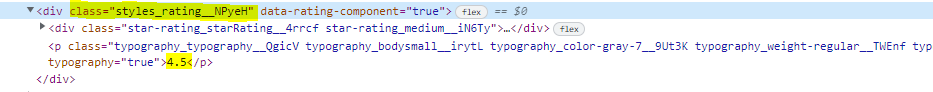

In [11]:
divTag = soup.find_all("div", {"class": "styles_rating__NPyeH"})
for tag in divTag:
    print(tag.text)
    rating_today = tag.text

2.0


Similarly for the other parts on the webpage:
- Rating
- Reviews
- Sentiment
- We'll also add the date using the datetime library.

In [12]:
divTag2 = soup.find_all("div", {"class": "styles_header__yrrqf"}) # get the class identifier

for tag in divTag2: # loop through the content of this tag
    header = tag.find_all("span")[0] # note that this is a list
    number_of_reviews = header.text
    print(number_of_reviews)

1,332


We only want the top number so add a break statement into the for loop. 

Webscraping is an iterative process where you want to be as specific as possible, so this means you have to be explicit with what you want the parser to return.

In [13]:
divTag3 =  soup.find_all("div", {"class":"styles_container__z2XKR"}) 

sentiment = []

for tag in divTag3:
    paragraph = tag.find_all("p")
    for goods in paragraph:
        sentiment.append(goods.text)

print(sentiment)

['Excellent', '24%', 'Great', '4%', 'Average', '5%', 'Poor', '12%', 'Bad', '55%']


## We now have the data, so let's place it into a dataframe using Pandas and export it as a .csv

In [14]:
from datetime import date

#Get the date for today
today = date.today()
today_formated = today.strftime("%d/%m/%Y")

In [15]:
df = pd.DataFrame()

#Create a dictionary to then turn it into a dataframe
dict = {'Date': today_formated, 'Link': url, 'Score': rating_today, 'Reviews': number_of_reviews}

# loop through the sentiment list and add the sentiments to the dictionary above
for i in range(0,10,2):
    dict[sentiment[i]] = sentiment[i+1].replace('<', '')
    if i == 8:
        break
pprint.pprint(dict)

{'Average': '5%',
 'Bad': '55%',
 'Date': '27/06/2022',
 'Excellent': '24%',
 'Great': '4%',
 'Link': 'https://uk.trustpilot.com/review/costacoffee.co.uk',
 'Poor': '12%',
 'Reviews': '1,332',
 'Score': '2.0'}


In [16]:
#Create the dataframe
df = df.append(dict, ignore_index = True, sort = False)

#Rearrange the columns
cols = ['Date', 'Link', 'Reviews', 'Score', 'Excellent', 'Great', 'Average',  'Poor', 'Bad']
df = df[cols]

df.head()

,Date,Link,Reviews,Score,Excellent,Great,Average,Poor,Bad
0,27/06/2022,https://uk.trustpilot.com/review/costacoffee.c...,"1,332",2.0,24%,4%,5%,12%,55%


### Exporting to csv


In [21]:
df.to_csv('Simple_Scrape_Example.csv', index=False)

# Create function or class to use for different companies

In [19]:
def webscrape(url):
    result = requests.get(url) 
    soup =  BeautifulSoup(result.text, 'html.parser') 
    
    
    divTag = soup.find_all("div", {"class": "styles_rating__NPyeH"})
    for tag in divTag:
        rating_today = tag.text
    
    
    divTag2 = soup.find_all("div", {"class": "styles_header__yrrqf"}) # get the class identifier

    for tag in divTag2: # loop through the content of this tag
        header = tag.find_all("span")[0] # note that this is a list
        number_of_reviews = header.text
    
    
    divTag3 =  soup.find_all("div", {"class":"styles_container__z2XKR"}) 
    sentiment = []

    for tag in divTag3:
        paragraph = tag.find_all("p")
        for goods in paragraph:
            sentiment.append(goods.text)
    return rating_today, number_of_reviews, sentiment

In [20]:
webscrape('https://uk.trustpilot.com/review/cafenero.co.uk')

('2.8',
 '140',
 ['Excellent',
  '33%',
  'Great',
  '11%',
  'Average',
  '4%',
  'Poor',
  '10%',
  'Bad',
  '42%'])

The possibilities are endless for the data that you can extract from the web! Hope this makes sense :)

Here is a fun project that I made a while ago that scrapes the lyrics of a song:
https://github.com/lukeveitch/LyricsScraper